# PART1 -> CLASSIFICATION TO PREFIX POSTFIX INFIX(MODEL)

In [60]:
#PART 1

#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#READING THE DATA AND SPLITTING THE CSV FILE
train = pd.read_csv('annotations.csv').iloc[0:45000,:]
test = pd.read_csv('annotations.csv').iloc[45000:,:]
# IMPORTING LIBRARIES FOR CNN
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
#K.set_image_dim_ordering('th')
K.set_image_data_format("channels_first")
# TO CONVERT IMAGES TO TENSOR
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   
                                   
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1.255)
train_data = train_datagen.flow_from_dataframe(dataframe = train, 
directory = 'data/training_set', x_col = 'Image', 
y_col = 'Label', seed = 42,
batch_size = 100, shuffle = True, 
class_mode="categorical",target_size = (64, 64),color_mode='grayscale')

test_data = test_gen.flow_from_dataframe(dataframe = test, 
directory = 'data/test_set', x_col = 'Image', 
y_col ='Label',
batch_size = 100, shuffle = True, 
class_mode="categorical",target_size = (64, 64),color_mode='grayscale')

# CREATING AN OBJECT OF SEQUENTIAL CLASS
cnn = tf.keras.models.Sequential()

# ADDING CONVULUTION LAYERS
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))

#POOLING
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#ADDING MORE LAYERS
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#FLATTENING 
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# ADDING OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

#COMPILING VARIOUS LAYERS
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# FITTING THE MODEL WITH TRAINING SET AND PREDICTING ACCURACY ON TEST SET
cnn.fit(x = train_data,validation_data=test_data, epochs = 10)

Found 45000 validated image filenames belonging to 3 classes.
Found 5000 validated image filenames belonging to 3 classes.
Epoch 1/10
450/450 [==============================] - 139s 309ms/step - loss: 0.5118 - accuracy: 0.7440 - val_loss: 34.3288 - val_accuracy: 0.8962
Epoch 2/10
163/450 [=========>....................] - ETA: 1:13 - loss: 0.2459 - accuracy: 0.8963

KeyboardInterrupt: 

In [7]:
dataset = pd.read_csv('annotations.csv').iloc[:,1].values

In [11]:
import numpy as np
from keras.preprocessing import image
results = []
test_size = 100
value = ""
correct = 0
n = test_size
for i in range (1,n+1):
        test_image = image.load_img("data/test_set/"+str(i+45000)+".jpg", target_size = (64, 64),color_mode = 'grayscale')
#        test_image.show()
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = -1)
        #PREDCITING ON FIRST PART
        result = cnn.predict(test_image)
        if result[0][0]==1:
            value = "infix"
        elif result[0][1]==1:
            value = "postfix"
        else:
            value = "prefix"
        if value==dataset[45000+i-1]:
            correct+=1
        results.append(value)
    

In [12]:
accuracy = correct/n
print(accuracy)

0.96


In [13]:
print(results)

['infix', 'infix', 'prefix', 'infix', 'prefix', 'postfix', 'prefix', 'postfix', 'postfix', 'postfix', 'infix', 'infix', 'infix', 'prefix', 'prefix', 'postfix', 'prefix', 'postfix', 'prefix', 'infix', 'prefix', 'postfix', 'postfix', 'prefix', 'prefix', 'prefix', 'prefix', 'postfix', 'prefix', 'prefix', 'prefix', 'infix', 'postfix', 'postfix', 'postfix', 'prefix', 'prefix', 'postfix', 'infix', 'infix', 'prefix', 'postfix', 'infix', 'postfix', 'infix', 'prefix', 'postfix', 'infix', 'infix', 'prefix', 'prefix', 'prefix', 'infix', 'prefix', 'postfix', 'infix', 'infix', 'postfix', 'prefix', 'infix', 'prefix', 'postfix', 'prefix', 'infix', 'infix', 'prefix', 'postfix', 'postfix', 'prefix', 'postfix', 'postfix', 'infix', 'prefix', 'prefix', 'infix', 'postfix', 'postfix', 'postfix', 'infix', 'prefix', 'infix', 'postfix', 'prefix', 'prefix', 'infix', 'infix', 'postfix', 'infix', 'infix', 'infix', 'postfix', 'postfix', 'postfix', 'infix', 'prefix', 'prefix', 'postfix', 'prefix', 'postfix', 'infix

In [14]:
array_2d= np.column_stack((results,dataset[45000:45000+n]))

In [15]:
import pandas as pd
(pd.DataFrame(array_2d)).to_csv("results2.csv")

In [16]:
#SAVING THE MODEL

model_json = cnn.to_json()
with open("model_final_1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model_final_1.h5")

In [18]:
#lOADING THE SAVED MODEL
from keras.models import model_from_json
json_file = open('model_final_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final_1.h5")

In [19]:
# Python code to demonstrate the use of 'sys' module
# for command line arguments
  
import sys
  
# command line arguments are stored in the form
# of list in sys.argv
argumentList = sys.argv
#print argumentList
  
# Print the name of file
#print sys.argv[0]
  
# Print the first argument after the name of file
testfolder_path=sys.argv[1]

# PART 2

In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

# IMPORTING LIBRARIES FOR FUTURE USE AND IMAGE MODIFICATION

In [ ]:
np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_dim_ordering('th')
K.set_image_data_format("channels_first")


# SPLITTING THE IMAGES

# MANUAL LABELLING OF AROUND 3300 IMAGES

# GENERATING TRAINING SET FROM SPLITTED IMAGES(RECOGNISING ALL 14 CHARACTERS(10 DIGITS AND 4 OPERATORS))

In [62]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(directory='NEW/',
                                    
                                                 target_size = (64, 64),
                                                 batch_size = 50,
                                                 class_mode = "categorical",color_mode = 'grayscale')

Found 8050 images belonging to 14 classes.


# CREATING THE VARIOUS LAYERS AND TRAINING THE MODEL ON TRAINING SET

In [63]:
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=200, activation='relu'))

cnn2.add(tf.keras.layers.Dense(units=14, activation='softmax'))

cnn2.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn2.fit(x = training_set,validation_data=training_set, epochs = 50)

Epoch 1/50
161/161 [==============================] - 29s 177ms/step - loss: 1.4294 - accuracy: 0.5466 - val_loss: 0.7087 - val_accuracy: 0.7826
Epoch 2/50
161/161 [==============================] - 28s 177ms/step - loss: 0.5982 - accuracy: 0.8183 - val_loss: 0.4347 - val_accuracy: 0.8673
Epoch 3/50
161/161 [==============================] - 29s 180ms/step - loss: 0.4094 - accuracy: 0.8724 - val_loss: 0.3130 - val_accuracy: 0.8998
Epoch 4/50
161/161 [==============================] - 29s 179ms/step - loss: 0.3208 - accuracy: 0.9011 - val_loss: 0.2761 - val_accuracy: 0.9181
Epoch 5/50
161/161 [==============================] - 30s 189ms/step - loss: 0.2693 - accuracy: 0.9163 - val_loss: 0.2343 - val_accuracy: 0.9272
Epoch 6/50
161/161 [==============================] - 29s 183ms/step - loss: 0.2273 - accuracy: 0.9320 - val_loss: 0.1872 - val_accuracy: 0.9461
Epoch 7/50
161/161 [==============================] - 30s 185ms/step - loss: 0.1947 - accuracy: 0.9374 - val_loss: 0.1635 - val_ac

# LABELS OF VARIUOS DIGITS AND OPERATORS

In [64]:
training_set.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'divide': 12,
 'multiply': 13}

# TESTING THE MODEL ON A SINGLE PREDICTION

In [65]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('im120.jpg', target_size = (64, 64),color_mode = 'grayscale')
test_image.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = -1)
result = cnn2.predict(test_image)
print(result)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# SAVING THE MODEL

In [66]:
model_json = cnn2.to_json()
with open("model_final_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn2.save_weights("model_final_2.h5")



# TESTING THE MODEL


In [67]:
#lOADING THE SAVED MODEL
json_file = open('model_final_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn2 = model_from_json(loaded_model_json)
# load weights into new model
cnn2.load_weights("model_final_2.h5")

# PREDICTING THE MODEL ON SOME OF THE LAST 5000(NON SPLITTED) IMAGES OF THE TEST SET

In [68]:
#READING THE VALUES OF THE DATASET
dataset = pd.read_csv('annotations.csv').iloc[:,2].values


In [69]:
dataset

array([ 7,  0, 21, ...,  1,  2, -2], dtype=int64)

In [31]:
# Python code to demonstrate the use of 'sys' module
# for command line arguments
  
import sys
  
# command line arguments are stored in the form
# of list in sys.argv
argumentList = sys.argv
#print argumentList
  
# Print the name of file
#print sys.argv[0]
  
# Print the first argument after the name of file
testfolder_path=sys.argv[1]

# FUNCTION TO SPLIT THE IMAGES OF TEST SET AND THEN PREDICT OUTPUT ON EACH INDIVIDUAL IMAGE AND COMBINE TO GENERATE FINAL VALUE

In [79]:
from PIL import Image,ImageOps
import cv2
import numpy as np
import os

correct=0
new_results =[]
# GET DIGIT FUNCTION TO GET INDICE CORRESPONDING TO THE DIGIT
def get_digit(arr):
    for i in range(0,len(arr)):
        if arr[i]==1:
            return i
    return 0

# TEST SIZE 
test_size = 1000
n = test_size #should be less than 5000
# FOR EVERY IMAGE IN TEST_SET 
for i in range(1,n+1):
# for filename in os.listdir(testfolder_path):
#         im = cv2.imread(os.path.join(folder,filename))

 
    # Opens a image in RGB mode
        im = Image.open('data/test_set'+"/"+str(i+45000)+".jpg")
        im = ImageOps.grayscale(im)
#         im.show()

        # Size of the image in pixels (size of original image)
        # (This is not mandatory)
        width, height = im.size

        # Setting the points for cropped image
        left = 0
        top = 0
        right = width/3
        bottom = height
        # Cropped image of above dimension
        # (It will not change original image)
        im1 = im.crop((left, top, right, bottom))
        im1.save('im1'+str(i)+'.jpg')
        test_image = image.load_img('im1'+str(i)+'.jpg', target_size = (64, 64),color_mode = 'grayscale')
#         test_image.show()
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = -1)
        #PREDCITING ON FIRST PART
        result1 = cnn2.predict(test_image)
#         print(result1)

        # Shows the image in image viewer



        # Setting the points for cropped image
        left = width/3
        top = 0
        right = 2*width/3
        bottom = height

        # Cropped image of above dimension
        im2 = im.crop((left, top, right, bottom))
        im2.save('im2'+str(i)+'.jpg')
        test_image = image.load_img('im2'+str(i)+'.jpg', target_size = (64, 64),color_mode = 'grayscale')
#         test_image.show()
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = -1)
        
        
        #PREDICTING ON SECOND PART
        result2 = cnn2.predict(test_image)

        # Shows the image in image viewer


        # Setting the points for cropped image
        left = 2*width/3
        top = 0
        right = width
        bottom = height

        # Cropped image of above dimension
        im3 = im.crop((left, top, right, bottom))
        im3.save('im3'+str(i)+'.jpg')
        test_image = image.load_img('im3'+str(i)+'.jpg', target_size = (64, 64),color_mode = 'grayscale')
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = -1)
        
        
        
        #PREDICTING ON THIRD PART
        result3 = cnn2.predict(test_image)
        
        # DECIDING WHICH IS OPERATOR AND WHICH IS OPERAND
        if result1[0][0]==1 or result1[0][1]==1 or result1[0][12]==1 or result1[0][13]==1:
            operator = result1
            op1 = get_digit(result2[0]) # GET INDICES CORRESPONDING TO DIGIT
            op2 = get_digit(result3[0]) # ACTUAL DIGIT WILL BE INDICE-
            # COMPUTE THE VALUE DEPENDING ON THE OPERATOR 
            if operator[0][0]==1:       
                value=float(op1)-2+float(op2)-2
            elif operator[0][1]==1:
                value = float(op1)-2-(float(op2)-2)
            elif operator[0][12]==1:
                if(float(op2)-2==0):value=0
                    #TO AVOID DIVISION BY ZERO ERROR
                else : value = (float(op1)-2)/(float(op2)-2)
            elif operator[0][13]==1:
                value = (float(op1)-2)*(float(op2)-2)
        elif result2[0][0]==1 or result2[0][1]==1 or result2[0][12]==1 or result2[0][13]==1:
            operator = result2
            op1 = get_digit(result1[0])
            op2 = get_digit(result3[0])
            if operator[0][0]==1:
                value=float(op1)-2+float(op2)-2
            elif operator[0][1]==1:
                value = float(op1)-2-(float(op2)-2)
            elif operator[0][12]==1:
                if(float(op2)-2==0):value=0
                else : value = (float(op1)-2)/(float(op2)-2)
            elif operator[0][13]==1:
                value = (float(op1)-2)*(float(op2)-2)
        else :
            operator = result3
            op1 = get_digit(result1[0])
            op2 = get_digit(result2[0])
            if operator[0][0]==1:
                value=float(op1)-2+float(op2)-2
            elif operator[0][1]==1:
                value = float(op1)-2-(float(op2)-2)
            elif operator[0][12]==1:
                if(float(op2)-2==0):value=0
                else : value = (float(op1)-2)/(float(op2)-2)
            elif operator[0][13]==1:
                value = (float(op1)-2)*(float(op2)-2)
        
        # adding the value to list of results 
        new_results.append(value)
         
        # counting the no of correct predictions 
        if dataset[45000+i-1]==value:
            correct+=1


In [80]:
# combining the results(predicted value) with the actual value in 2d array 
array_2d= np.column_stack((new_results,dataset[45000:45000+n]))

In [81]:
print(array_2d)

[[ 1.  1.]
 [ 4.  4.]
 [ 6.  6.]
 ...
 [18. 18.]
 [10. 10.]
 [ 0.  0.]]


In [82]:
#predicting the accuracy
accuracy = correct/(n)
print(accuracy)

0.887


In [ ]:
import matplotlib.pyplot as plt

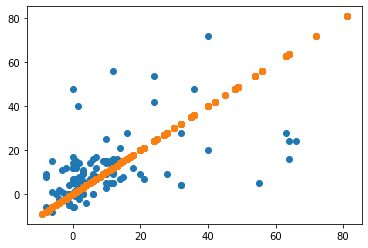

In [83]:
# plot y=x (orange) with the points corresponing to prediction
plt.scatter(array_2d[:,0],array_2d[:,1])
plt.scatter(array_2d[:,1],array_2d[:,1])

In [84]:
# converting 2d array to dataframe and then converting dataframe to csv
import pandas as pd
(pd.DataFrame(array_2d)).to_csv("Team_Name_2.csv")